# RNN : Recurrent Neural Networks

RNNs are a very famous family of NNs, which are particularly suited for processing sequences.

### FFNN and RNN
Two main classes of NNs.
1. Feed-Forward NN. They are NNs which do not contain cycles. The information flows only in one direction, from left to right. Each layer is connected only to the next layer, in a forward way. All the techniques seen since now (e.g. Dense and Conv layers) are Feed-Forward techniques.
2. RNN. They are NNs which do contain cycles. The output of a layer can go into the input of a previous layer.

### Problems involving sequences

A lot of problems involve sequences. Basically, all the problems which deal with texts, songs, time-series, video, ... .

All these afromentioned data structures are indeed sequences.
- Text is a sequence of characters/words: in general, sequence of tokens.
- Song is a sequence of frequencies.
- Time-serie is a temporal sequence of values.
- Video is a sequence of images.

There are many kinds of problems involving sequences.
- Sequence as input, one output. E.g.: classification of a text, like sentiment analysis.
- One input, sequence as output. E.g. : produce a  textual description of an image.
- Sequence as input, sequence as output. Sequence-to-sequence learning, or Seq2Seq. Like translation. Or, like sound=>text transformation.

Vary famous task in NLP: Language Modeling. Given a text, predict the next token for continuing the sentence. Return in output the most probable token for continuing the sentence. From a sequence, to a single output.


### Dealing with this kind of problems

For dealing with this kind of problems, there are two main approaches.
1. Memory-less approach. We use a classic feed-forward NN. Normal NN techniques (dense and Conv layers).
2. RNN. We use a RNN. With this approach, we have memory.
In the past, RNNs were the most powerful way for dealing with sequences. Now, the Transformer architecture has taken place over RNNs: Trasformers are classic Feed-Forward architectures.

## RNN: INTRODUCTION

RNN: it can contain cycles. Not anymore Feed-Forward NN, in which each layer is connected to the next layer ina forward way. But we can have backward connections: the output of a neuron can go as input into a neuron of a previous layer. 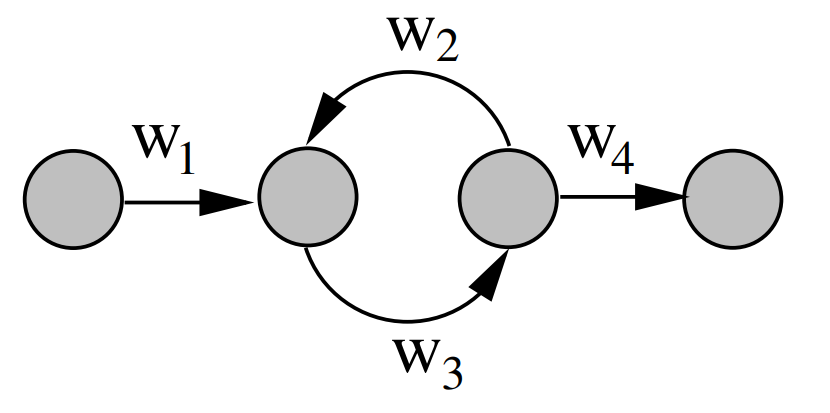 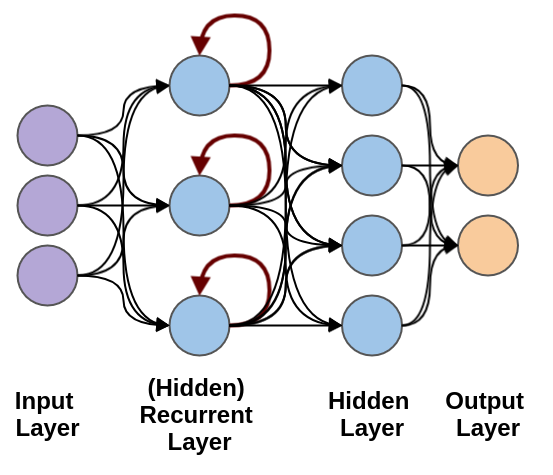

### Why is this problematic?

In general, a network in which there are cycles is problematic. Because it is really unstable.

Example. We have a logic circuit, with a cycle. 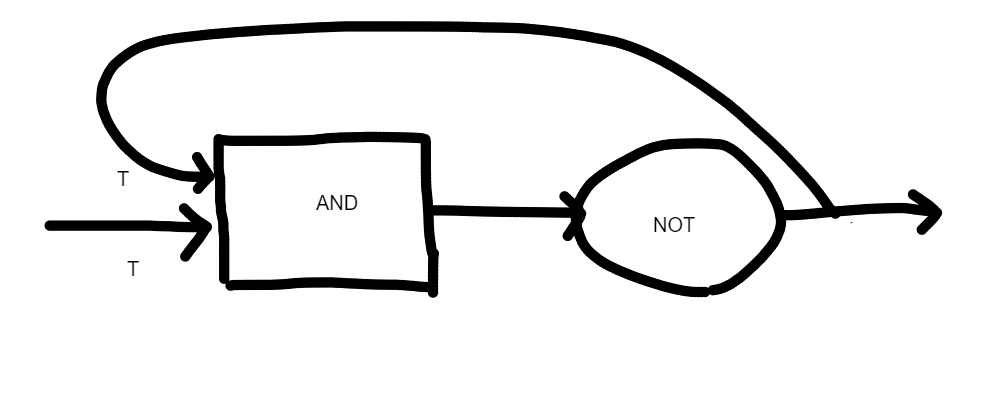

If we pass in input True, supposing the the other input is initially True.
- The final output is False.
- But now, the other input is False, then the final output is True
- But now, the other input is True, then the final output is False.

And so on. **Instability**. No single and definite output. Given a fixed input, no fixed and stable output.

RNNs are unstable: given an input, no single and definite output.

### Time steps

For solving this unstability of RNNs, we consider time steps.

We allow the broadcasting of the signal in the NN only at the beginning of a time step. Then, until the next time step,  everything is frozen. (Basically, the value in the cycle is not propagated back, it is frozen). In this way, during a time step, you are stable: the output does not change. Then, in the beginning of the next time step, the values flow freely, and, so, the output can change.

We are still unstable, we still have different outputs. But at different time steps: in the same time step, we have a single output.

Basically, we have a sequence of outputs:
1. Output at time $0$: $o_0$.
2. Output at time $1$: $o_1$.
3. Output at time $2$: $o_2$.

...

In addition to that, at different time steps, we can have different inputs.
1. Input at time $0$: $i_0$.
2. Input at time $1$: $i_1$.
3. Input at time $2$: $i_2$.

... 

### Sequence processing

Now we can understand why RNNs are suited for processing sequences. Because they naturally model sequence.

Input: is a sequence $i_0, i_1, ..., i_n$. Output: is a sequence $o_0, o_1, ..., o_n$. Where $n$ is the maximum time step that we allow. And it is the length of the sequence of interest.

Each input/output can be a token in a text, or an image in a video, or ... . Inputs and outputs can be different data structures.

This is sequence-to-sequence processing. If we want one single input, we consider only the first input $i_0$. If we want only one output, we consider only the last output $o_n$.

### The output values change, the weigths remain the same

Given a RNN, the output value of each neuron can change in different time steps. While the weigths remain always the same.
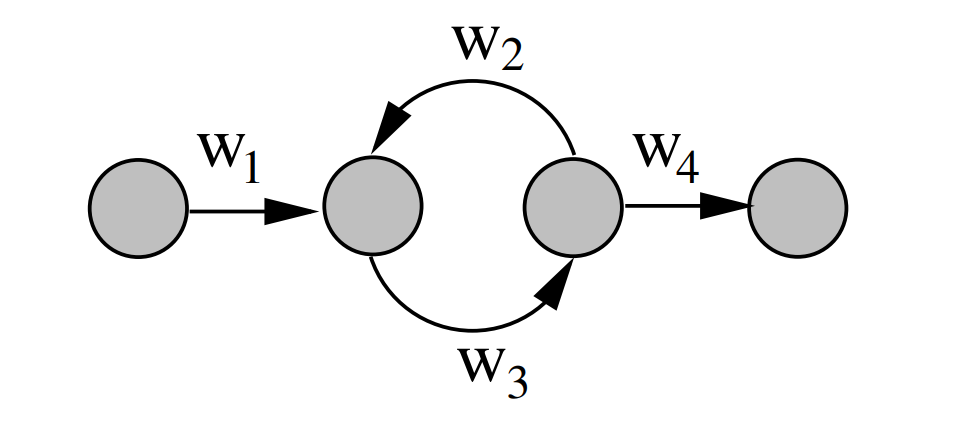

## TEMPORAL UNFOLDING

The way a RNN is actually seen and implemented is through its temporal unfolding. Which is basically the Feed-Forward version of the RNN.

Given a RNN, we know that it is divided into time steps: each neuron of the network can assume different values at different time steps. 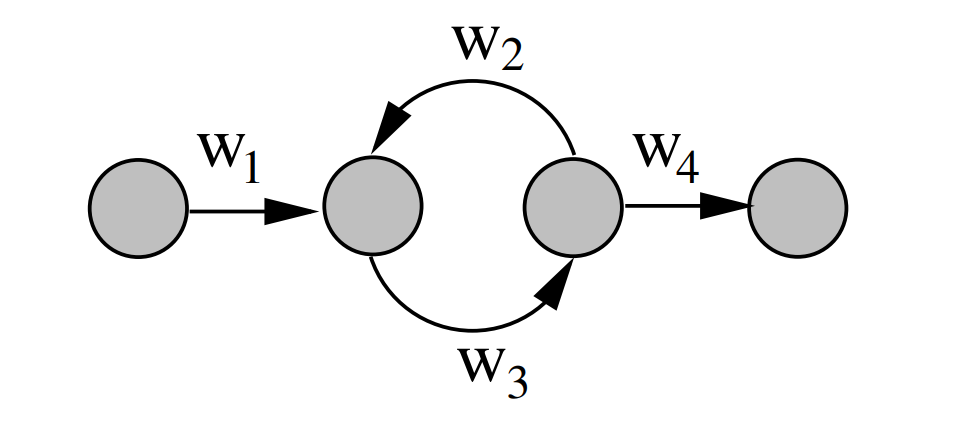

Instead of seeing the network in this temporal complex way, we unroll it through the different time steps. We unfold the RNN over time. 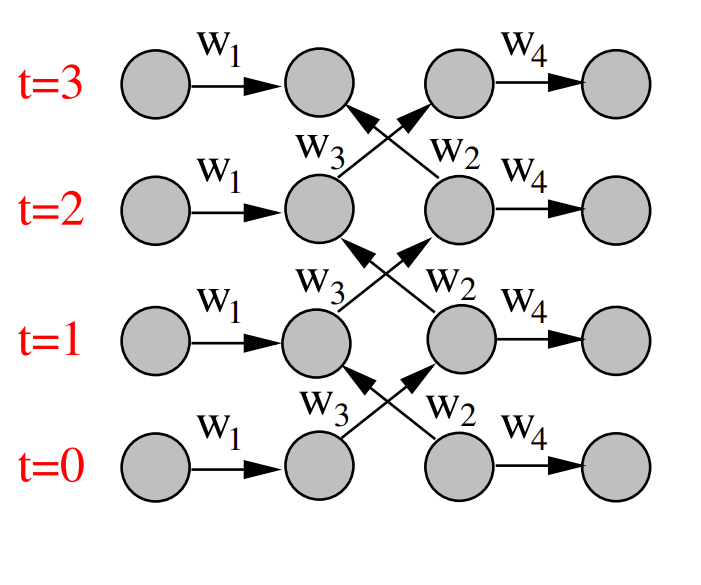

**The very important point is that we have transformed a RNN into a classic Feed-Forward NN. We have transformed a cycle into classic Feed-Forward layer. More precisely, each different time step corresponds to a different classic Feed-Forward layer.**

We break the cycle into connections between each previous layer with the next layer.

### Sequence processing

So, the temporal unfolding is a classic Feed-Forward NN. But it processes sequences.

Indeed:
- Each time step/feed-forward layer has its own input $i_t$. So, on the whole, we have a sequence of inputs $i_0, i_1, ...$.
- Each time step/feed-forward layer has its own output $o_t$. So, on the whole, we have a sequence of inputs $o_0, o_1, ...$.

If we fix as $n$ the maximum time step, we have $n$ feed-forward layers. And so, the interface is the following: sequence of $n$ inputs $i_0, i_1, ..., i_n$ $\implies$ sequence of $n$ outputs $o_0, o_1, ..., o_n$.

As said before, if we want we can consider a single input (the first one $i_0$) or a single output (the last one $o_n$).

### Important remark

Yes, the temporal unfolding is a classic Feed-Forward NN. But it is a peculiar one: the weigths are shared across layers/time steps.

Indeed, we know that the RNN has the same weights, across different time steps (the output values of the neurons change, the weigths of the neurons not).

**So, the different layers of the temporal unfolding have the exact same weigths. The weigths are shared between the layers.**

### Training a RNN
The training of a RNN is based on the temporal unfolding.

The temporal unfolding is considered, which is a classic Feed-Forward NN. So, the classic gradient descent training algorithm is applied, with backpropagation.

The only difference is that we have shared weigths: we have to take this into account. Basically, when updating the weigths, we have to average the updates related to the same weigth, and to update all the occurances of that weigths in a consistent way.

### The training is problematic
So, a RNN is trained by considering its temporal unfolding, which is a classic Feed-Forward NN. In particular, it is a huge deep Feed-Forward NN.

So, as all the huge deep NNs, there are problems during training. Like the vanishing gradient problem. See next notebook about LSTM.

## RNN : GENERAL STRUCTURE

Let's see the actual general structure of a RNN.

### Definition
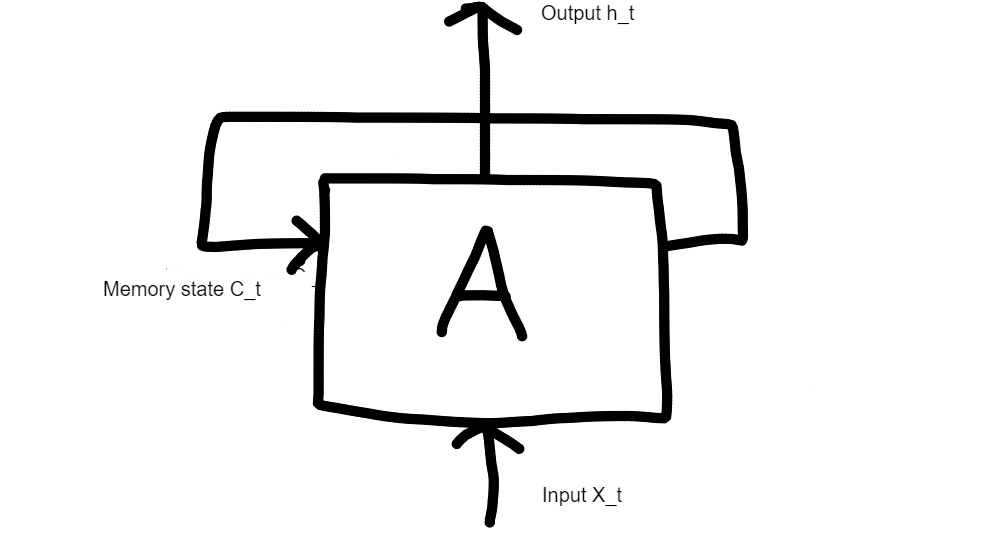
Module $A$. Time step $t$: input $X_t$, memory state $C_t$, output $h_t$. 

$C_t$ can be seen as the content of the RNN at each time step. It can be seen as the **memory** of the RNN at each time step.

At each time step $t$, the current memory $C_{t-1}$ and the current input $X_t$ are concatenated and processed for generating the new memory $C_t$ and the new output $h_{t}$.

In the simple RNN, the memory state $C_t$ is equal to the output $h_t$. $C_t \equiv h_t$.

### Temporal unfolding point of view
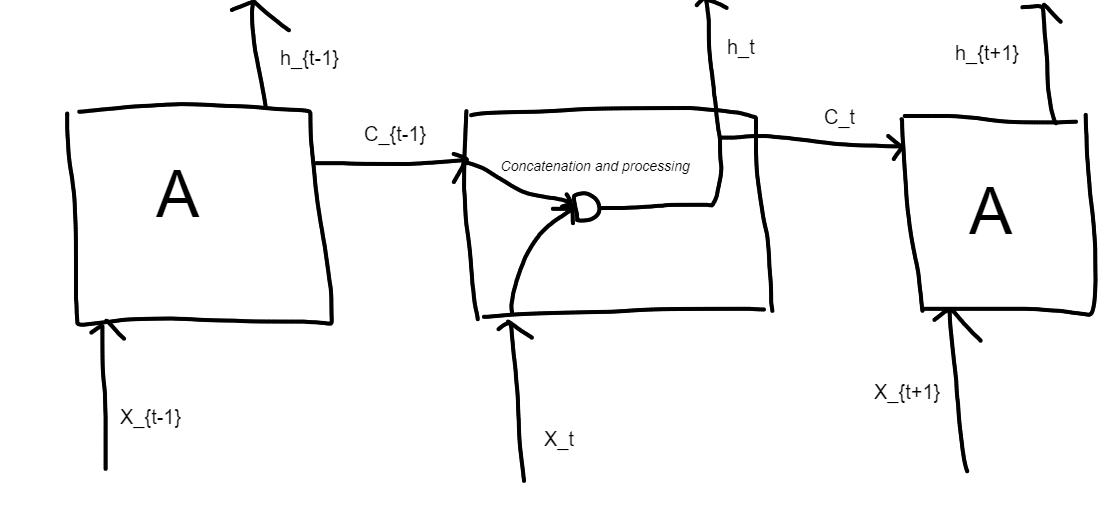

We are the time step $t$. Module $A$: it take the input $X_t$ and the current memory state $c_{t-1}$. It combines and process them, for generating the output $h_t$, which is also the next memory state $C_t$.

## RNN : SUM UP

### Definition
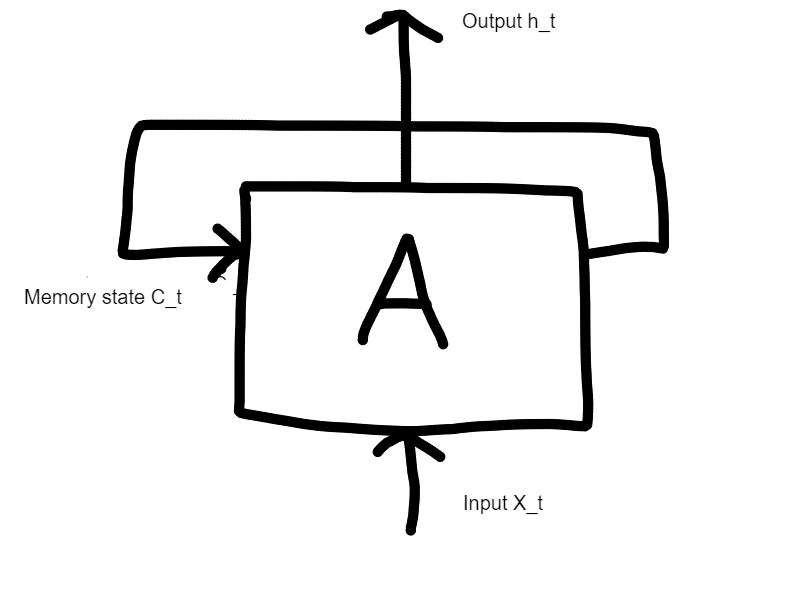
Time step $t$: input $X_t$, memory state $C_t$, output $h_t$.

We remind that each memory state is equal to the output: $C_t \equiv h_t$.

We have $N$ time steps. Therefore, we have:
- An input sequence of length $N$: $X_1, X_2, ..., X_N$. Each input has the same dimension.
- An output sequence of length $N$: $h_1, h_2, ..., h_N$. Each output has the same dimension.

We have also a sequence of $N$ memory states $C_1, ..., C_N$. Each memory state has the same dimension.

Basically, we are doing a processing of a sequence of $N$ elements: $X_1, X_2, ..., X_N$ $\implies$ $h_1, h_2, ..., h_N$.

We can also have a single input (the first one $X_1$) or a single output (the last one $h_N$).

### Temporal unfolding point of view
This is the most typical way of seeing and implementing a RNN.

It is a completely Feed-Forward NN, with shared weigths.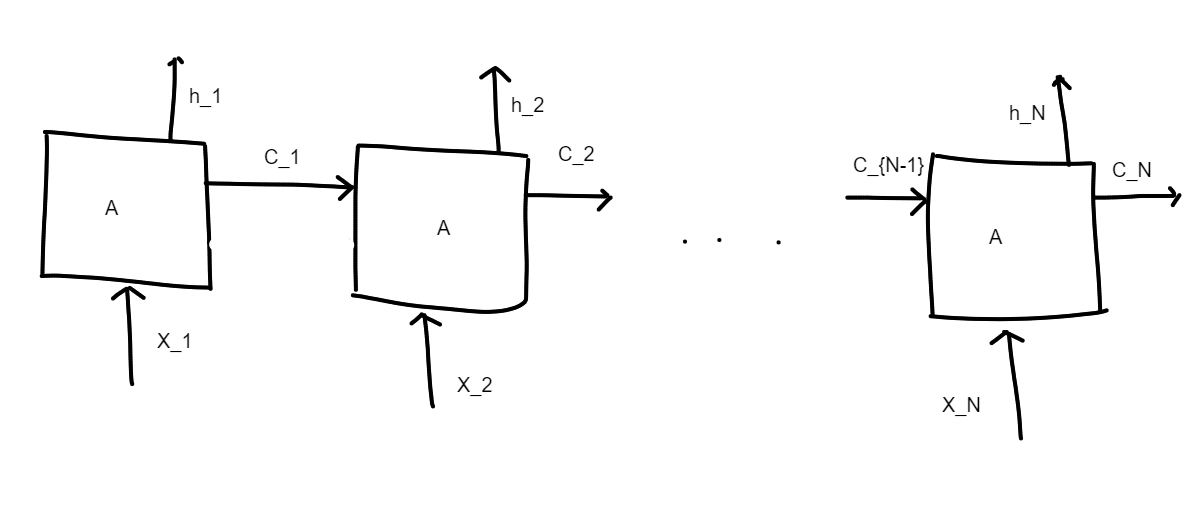
- Input sequence of length $N$: $X_1, X_2, ..., X_N$. Each input has the same dimension.
- Output sequence of length $N$: $h_1, h_2, ..., h_N$. Each output has the same dimension.
- Sequence of $N$ memory states $C_1, ..., C_N$. Each memory state has the same dimension.

Basically, we are doing a processing of a sequence of $N$ elements: $X_1, X_2, ..., X_N$ $\implies$ $h_1, h_2, ..., h_N$.

We can also have a single input (the first one $X_1$) or a single output (the last one $h_N$).

### Black-box point of view

Basically, a RNN can be seen as a single block. Single black-box, whose aim is to process a sequence of length $N$. **Black-box module for sequence processing.** 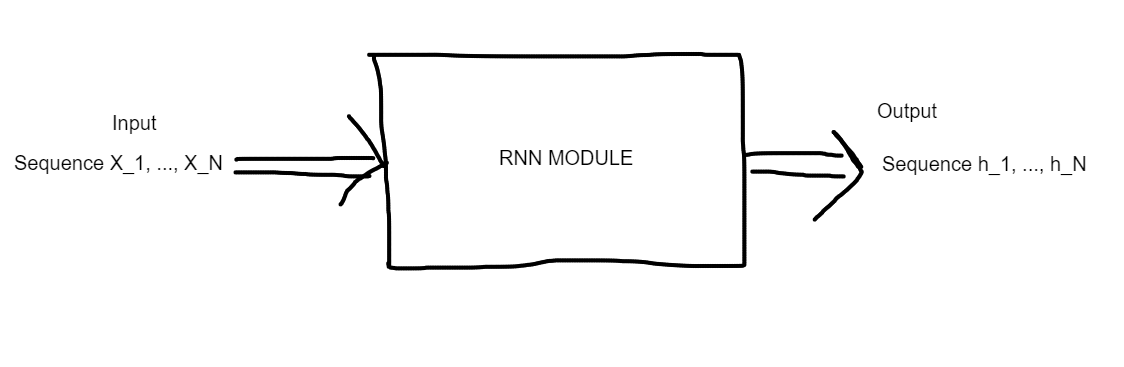

Each input has the same dimension. Each output has the same dimension.

We can also have a single input (the first one $X_1$) or a single output (the last one $h_N$).

Of course, when using a RNN module, we have to keep in mind that this processing is done in a recurrent way: the processing is done step after step.
- The input is processed step after step. One input at a time, in sequence.
- At the same time, the output is generated step after step. One output at a time, in sequence.

This implies that the generation of the output can't be paralellized.

### Insight about the dimensions of the input, about the dimensions of the output, about the dimensions of the memory states

Each input $X_t$ has the same dimensions. It can be a flat vector (e.g. token in a text), or it can be a structured input (e.g. image in a video).

Each output $h_t$ has the same dimensions. It can be a flat vector (e.g. token in a text), or it can be a structured tensor (e.g. image in a video).

Each memory state $C_t$ has the same dimensions. It can be a flat vector, or it can be a structured tensor. We remind that, for each $t$, $C_t \equiv h_t$.

## RNN IN KERAS

This kind of RNN described in this notebook is implemented in keras as a layer: `SimpleRNN` layer. Documentation: https://keras.io/api/layers/recurrent_layers/simple_rnn/.

Guide to RNNs in general in TensorFlow/Keras: https://www.tensorflow.org/guide/keras/rnn, https://keras.io/guides/working_with_rnns/.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN

### Input

The imput of the RNN layer has the following three dimensions: $B, N, I$.
- $B$ is the batch size, i.e. the number of samples. Each sample is a sequence. Each sample is an input sequence.
- $N$: number of elements in each sequence. Each input sequence has the structure $X_1, ..., X_N$.
- $I$: dimension of each input element $X_t$. So, each input element $X_t$ is a flat vector, with $I$ values.

Basically, $N$ is the number of time steps in the RNN. Which is the number of modules in the temporal unfolding.

In [2]:
# Defining an input with 32 samples, where each sample is a sequence of 10 elements X_t, where each element X_t is a vector 
# of lengths 8
inputs = tf.random.normal([32, 10, 8])

### Layer
In defining the RNN layer, we have to define `units`, which is the dimension $O$ of each output $h_t$. So, each output element $h_t$ is a flat vector, with $O$ values.

Basically, `units` is the number of neurons in each output $h_t$.

This is also the dimension of each memory state $C_t$.

In [6]:
last_outputs = SimpleRNN(units=4)(inputs)

### Output

By default, the RNN layer returns, for each input sequence $X_1, ..., X_N$, only the last output $h_N$. So, by default, the RNN layer returns, for each input sequence, only one output, the last one.

This means that the output has dimensions $BxO$, where $B$ is the number of samples and $O$ is the dimension of the last output $h_N$.

In our case, the output has shape $32x4$.

In [7]:
last_outputs.shape

TensorShape([32, 4])

### Return the full output sequence

We can specify to the RNN layer to return the full output sequence $h_1, ..., h_N$, and not only the last output $h_N$. This is specified through the `return_sequences` argument.

In [9]:
whole_outputs = SimpleRNN(units=4, return_sequences=True)(inputs)

In this way, for each input sequence $X_1, ..., X_N$, the RNN layer returns an output sequence of the same length: $h_1, ..., h_N$.

So, the dimensions of the output are $BxNxO$, where $B$.

In our example: $32x10x4$.

In [10]:
whole_outputs.shape

TensorShape([32, 10, 4])

### Return also the memory states

We can specify to the RNN layer to return also the memory state, only the last one: $C_N$. This, for simple RNNs, is equal to $h_N$.

In [12]:
whole_outputs, last_memory_states = SimpleRNN(units=4, return_sequences=True, return_state=True)(inputs)

In [13]:
whole_outputs.shape

TensorShape([32, 10, 4])

In [14]:
last_memory_states.shape

TensorShape([32, 4])